In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
data = load_breast_cancer()

In [3]:
dataframe = pd.DataFrame(data.data,columns=data.feature_names)
dataframe['target'] = data.target
dataframe['target'] = dataframe['target'].apply(lambda x:data.target_names[x])

In [4]:
dataframe.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,malignant
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,malignant
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,malignant
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,malignant
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,malignant
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,malignant


In [5]:
dataframe.shape

(569, 31)

KNN:

In [6]:
X = dataframe[['mean radius','mean concave points']].values

In [7]:
Y = dataframe['target'].map({'benign':0,'malignant':1})

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,stratify = Y)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
K = [2,3,4,5,6,7,8,9,10]
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train,Y_train)
    y_pred_knn = knn.predict(X_test)
    acc.append(accuracy_score(Y_test,y_pred_knn))

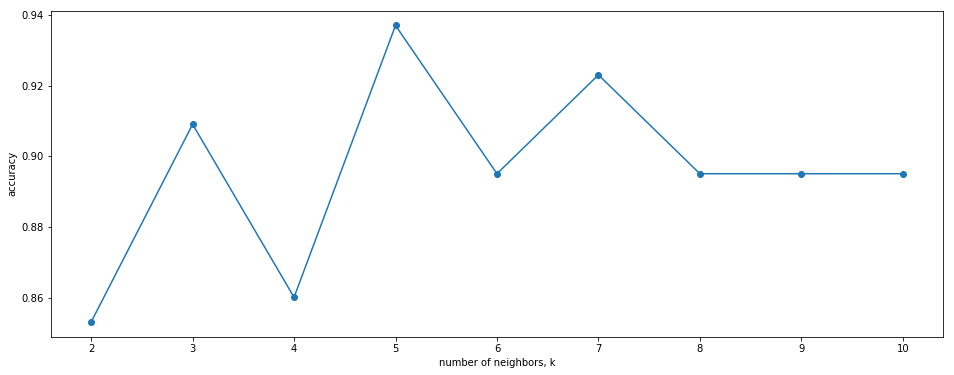

In [11]:
plt.figure(figsize = (16,6))
plt.plot(K, acc, '-o')
plt.xlabel('number of neighbors, k')
plt.ylabel('accuracy')
plt.xticks(K)
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred = knn.predict(X_test)

In [14]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        90
           1       0.93      0.81      0.87        53

    accuracy                           0.91       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



Deccision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from six import StringIO  
import pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz


In [16]:
X = dataframe.drop(columns='target')

In [17]:
y = dataframe['target'].map({'benign':0,'malignant':1})

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

In [19]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_predicted = tree_model.predict(X_test)

In [21]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        90
           1       0.85      0.98      0.91        53

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



Random Forest

In [22]:
X = dataframe.drop(columns='target')

In [23]:
y = dataframe['target'].map({'benign':0,'malignant':1})

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [26]:
rf = RandomForestClassifier(n_estimators = 500, min_samples_leaf = 0.13, random_state = 1)

In [27]:
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=0.13, n_estimators=500, random_state=1)

In [28]:
y_pred_rf = rf.predict(X_test)

In [29]:
importances_rf = pd.Series(rf.feature_importances_,
                          index = X.columns)

In [30]:
sorted_importances_rf = importances_rf.sort_values()

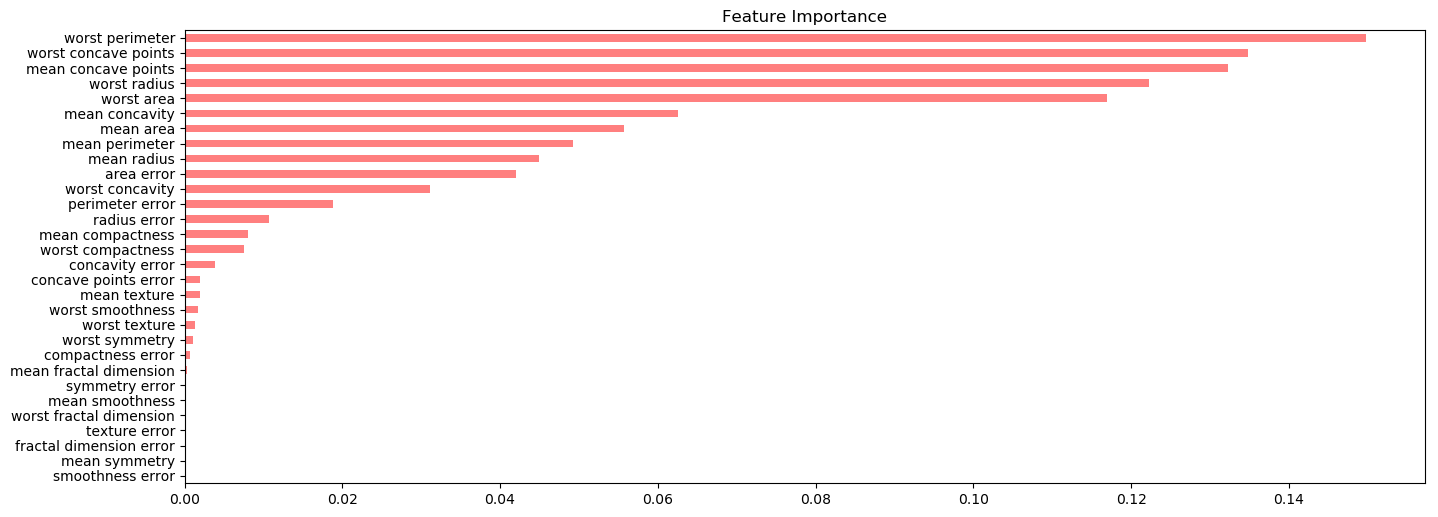

In [31]:
plt.figure(figsize = (16,6),dpi = 100)
sorted_importances_rf.plot(kind = 'barh',
                        color = 'red',alpha = 0.5)
plt.title("Feature Importance")

In [32]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        90
           1       0.91      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

